#**Project Title: Churn Prediction**

###**Problem Statement:**

The goal of this project is to develop a machine learning model that can predict whether a customer will leave the bank based on various features provided in the dataset. This prediction will help the bank in identifying customers who are at risk of leaving, allowing them to take proactive measures to retain those customers.

Dataset:
The dataset contains information about bank customers, including their credit score, location, gender, age, tenure, balance, number of products, credit card status, activity status, estimated salary, and whether or not they have exited the bank.

Approach:
1. Data Preprocessing: Clean the dataset by handling missing values, encoding categorical variables, and scaling numerical features if necessary.
2. Exploratory Data Analysis (EDA): Analyze the distribution of each feature, identify correlations between features and the target variable (Exited), and visualize relationships using plots.
3. Feature Engineering: Create new features or transform existing ones to improve model performance.
4. Model Building: Train various machine learning models such as logistic regression, decision trees, random forests, and gradient boosting classifiers.
5. Model Evaluation: Evaluate the performance of each model using metrics like accuracy, precision, recall, F1-score, and ROC AUC score. Select the best-performing model for deployment.
6. Model Deployment: Deploy the selected model in a production environment to make real-time predictions on new data.

The ultimate objective is to develop a reliable churn prediction model that can assist the bank in reducing customer attrition and improving overall customer satisfaction and retention.

####**Dataset**
- RowNumber: Corresponds to the record (row) number and has no effect on the output.
- CustomerId: Contains random values and has no effect on customer leaving the bank.
- Surname: The surname of a customer has no impact on their decision to leave the bank.
- CreditScore: Can have an effect on customer churn, as a higher credit score is associated with lower likelihood of leaving the bank.
- Geography: A customer’s location can affect their decision to leave the bank.
- Gender: Explore whether gender plays a role in customer churn.
- Age: Older customers are less likely to leave the bank compared to younger ones.
- Tenure: Number of years the customer has been a client of the bank; older clients are typically more loyal.
- Balance: Higher account balances indicate lower likelihood of leaving the bank.
- NumOfProducts: Number of products purchased through the bank.
- HasCrCard: Denotes whether the customer has a credit card, which may affect churn.
- IsActiveMember: Active customers are less likely to leave the bank.
- EstimatedSalary: Customers with lower salaries are more likely to leave the bank.
- Exited: Binary indicator of whether the customer left the bank (0=No, 1=Yes).

####Import library

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Interview_question_solved/Deep learning learning/Models/Dataset/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64



*   There are no null values



In [ ]:
print(len(df[df.duplicated()]))

0




*   There are no duplicates found



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
df.drop(['CustomerId','Surname'],axis=1,inplace=True)


We are dropping the 'CustomerId' and 'Surname' columns from the dataframe because these columns contain information that is not relevant to the prediction task of determining whether a customer will leave the bank.

*   'CustomerId': Contains random values assigned to each customer and does not provide any meaningful insights into customer behavior or churn.
*   'Surname': The surname of a customer is unlikely to have any impact on their decision to leave the bank. It is considered irrelevant for predicting customer churn.

Therefore, dropping these columns helps to simplify the dataset and focus on the features that are more likely to influence the target variable, 'Exited' (whether the customer left the bank).

In [ ]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#####Perform one hot encoding

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(prefix='Geo',data=df,columns=['Geography'],dtype=int)

In [ ]:
df.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
df = df.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [ ]:
df.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Geo_France       10000 non-null  int64  
 12  Geo_Germany      10000 non-null  int64  
 13  Geo_Spain        10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


#####EDA

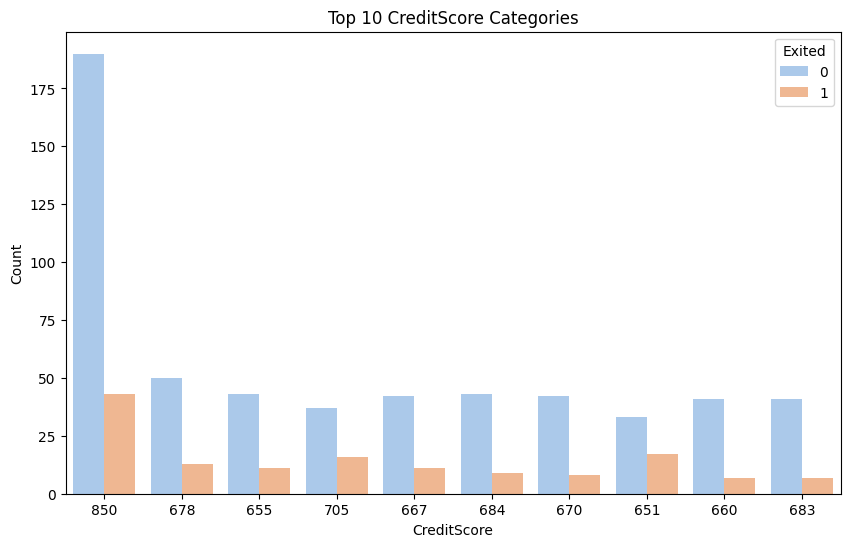

In [ ]:
# Plot 1: CreditScore
plt.figure(figsize=(10, 6))
sns.countplot(x='CreditScore', data=df, hue='Exited', order=df['CreditScore'].value_counts().head(10).index)
plt.title('Top 10 CreditScore Categories')
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()



*   Top 10 credit score categories



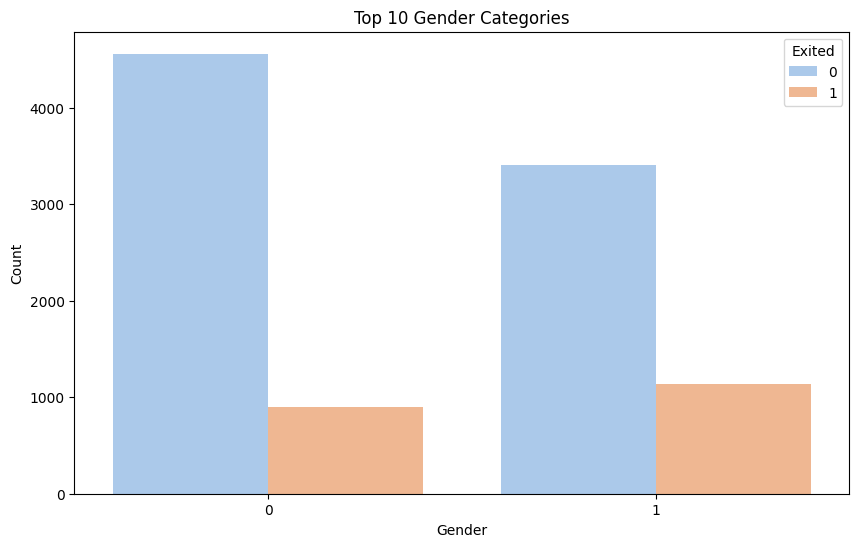

In [ ]:
# Plot 2: Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, hue='Exited', order=df['Gender'].value_counts().head(10).index)
plt.title('Top 10 Gender Categories')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()

*   The number of male customers exceeds that of female customers, yet a higher proportion of female customers have left the bank, indicating churn among this demographic.


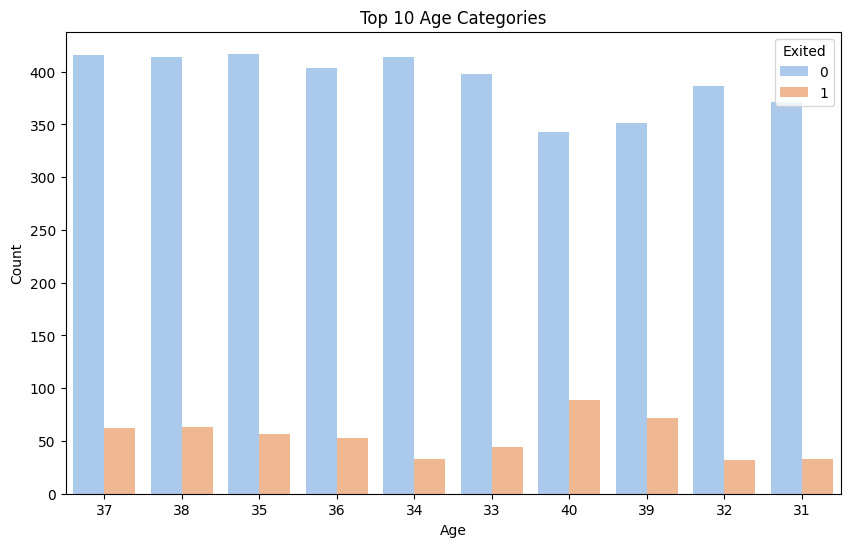

In [ ]:
# Plot 3: Age
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df, hue='Exited', order=df['Age'].value_counts().head(10).index)
plt.title('Top 10 Age Categories')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()



*   Top age categories are between 31 to 37 and 35 to 40 had left the bank indicating churn




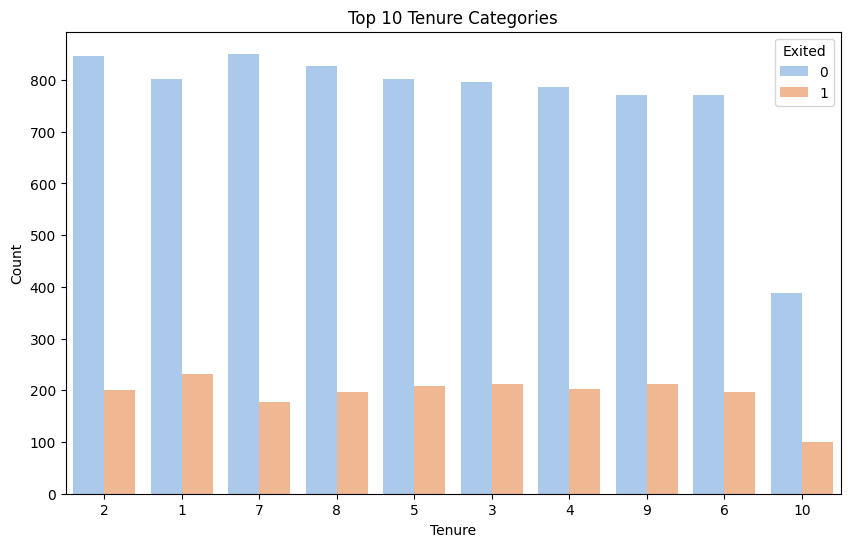

In [ ]:
# Plot 4: Tenure
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', data=df, hue='Exited', order=df['Tenure'].value_counts().head(10).index)
plt.title('Top 10 Tenure Categories')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()

*   The highest tenures are observed at 1, 2, 5, 7, and 8 years.

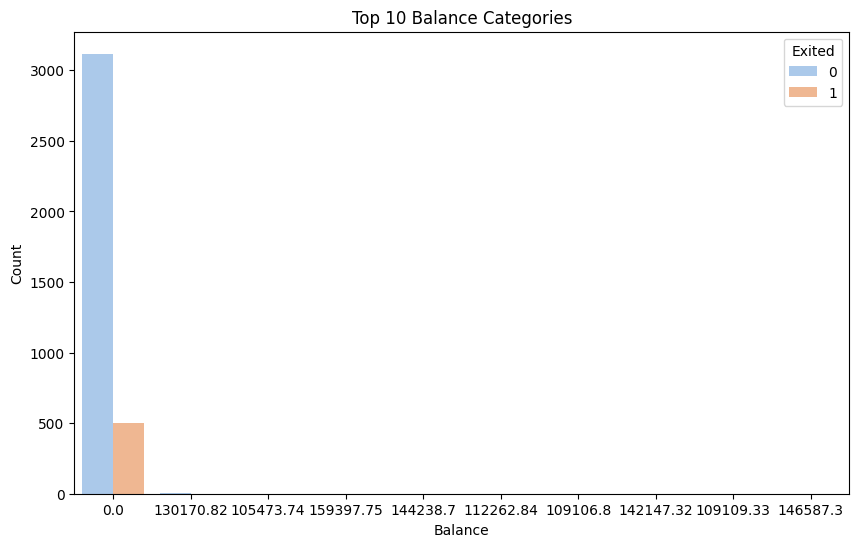

In [ ]:
# Plot 5: Balance
plt.figure(figsize=(10, 6))
sns.countplot(x='Balance', data=df, hue='Exited', order=df['Balance'].value_counts().head(10).index)
plt.title('Top 10 Balance Categories')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()


*   Top 10 Balance Categories

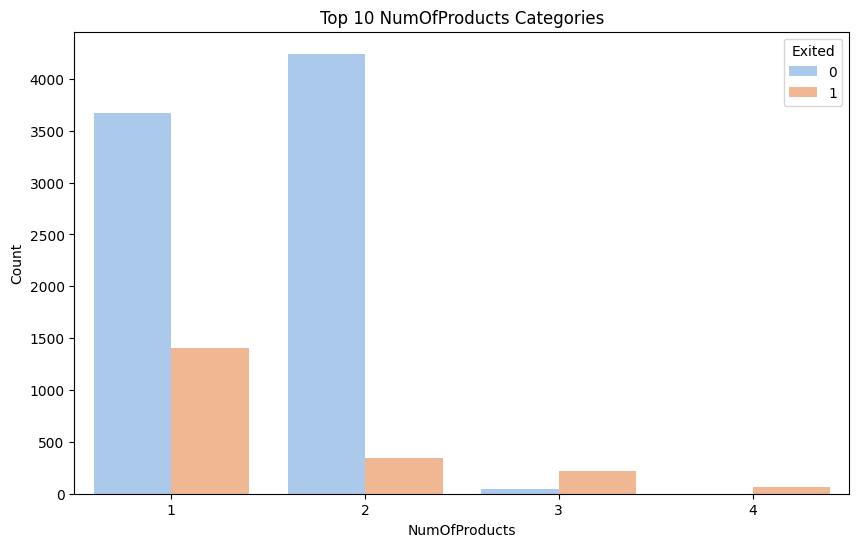

In [ ]:
# Plot 6: NumOfProducts
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', data=df, hue='Exited', order=df['NumOfProducts'].value_counts().head(10).index)
plt.title('Top 10 NumOfProducts Categories')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()


*   A higher number of customers purchased one or two products, and among them, customers who purchased one product have left the bank.


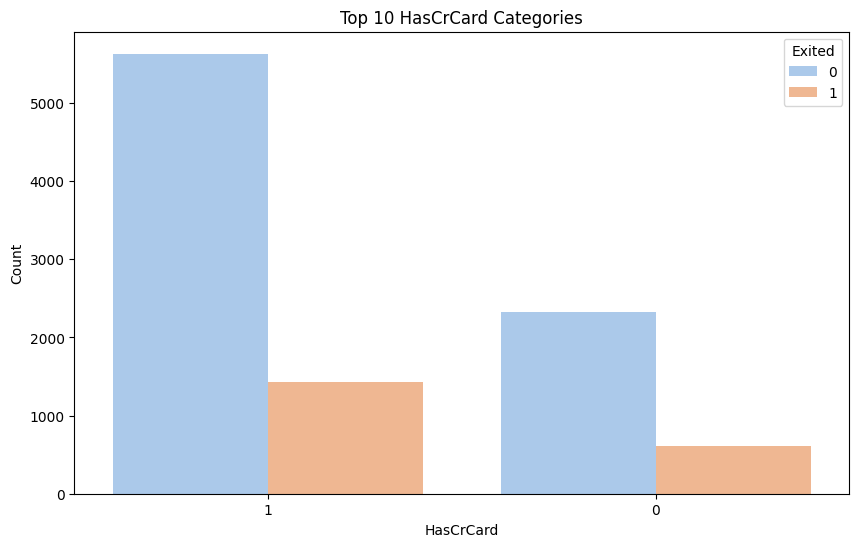

In [ ]:
# Plot 7: HasCrCard
plt.figure(figsize=(10, 6))
sns.countplot(x='HasCrCard', data=df, hue='Exited', order=df['HasCrCard'].value_counts().head(10).index)
plt.title('Top 10 HasCrCard Categories')
plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()

*   Over 5000 customers have a credit card, with approximately 1300 of them leaving the bank. Conversely, over 2300 customers do not have a credit card, and nearly 800 of them have left the bank.

*   The majority of customers possess a credit card, with a significant portion of those without a credit card also leaving the bank.

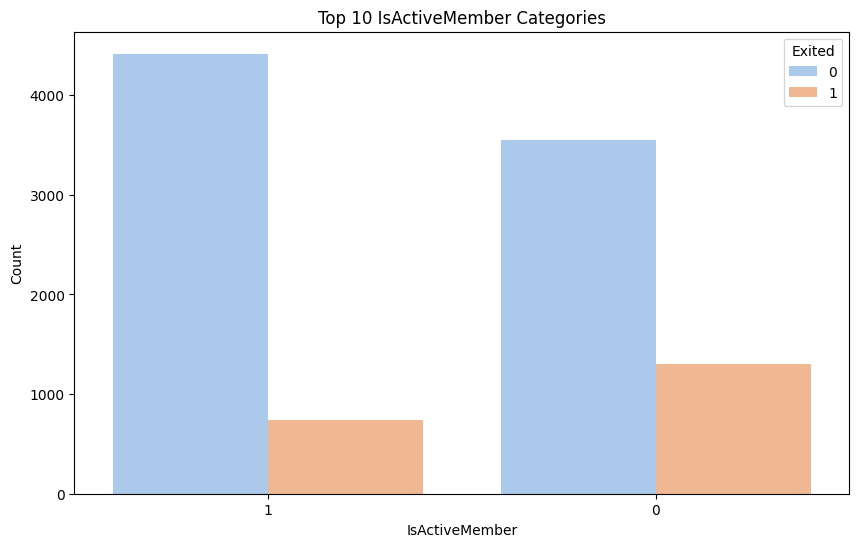

In [ ]:
# Plot 8: IsActiveMember
plt.figure(figsize=(10, 6))
sns.countplot(x='IsActiveMember', data=df, hue='Exited', order=df['IsActiveMember'].value_counts().head(10).index)
plt.title('Top 10 IsActiveMember Categories')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()

* Out of over 4000 active customers, around 800 left the bank, while among the approximately 3500 inactive customers, nearly 1300 departed. This suggests that inactive customers were more likely to leave the bank compared to active ones.

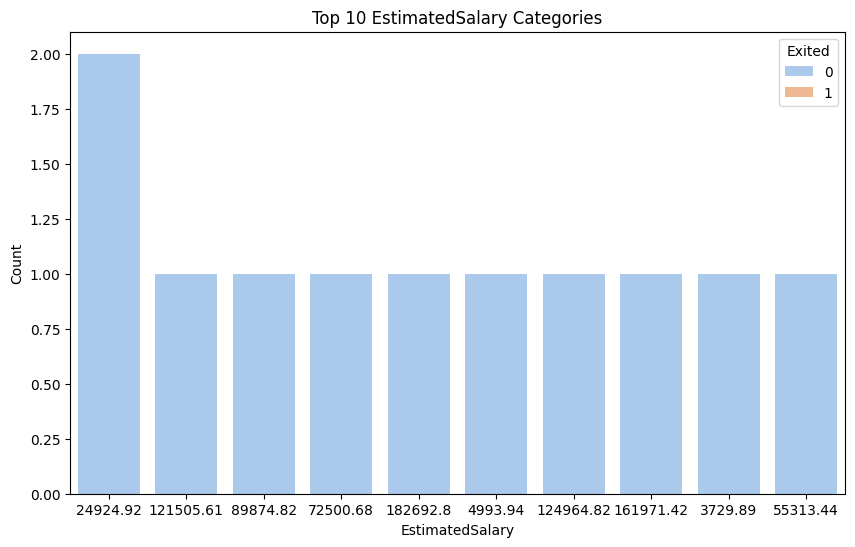

In [ ]:
# Plot 9: EstimatedSalary
plt.figure(figsize=(10, 6))
sns.countplot(x='EstimatedSalary', data=df, hue='Exited', order=df['EstimatedSalary'].value_counts().head(10).index)
plt.title('Top 10 EstimatedSalary Categories')
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()

*   people with lower salaries are more likely to leave the bank compared to those with higher salaries.


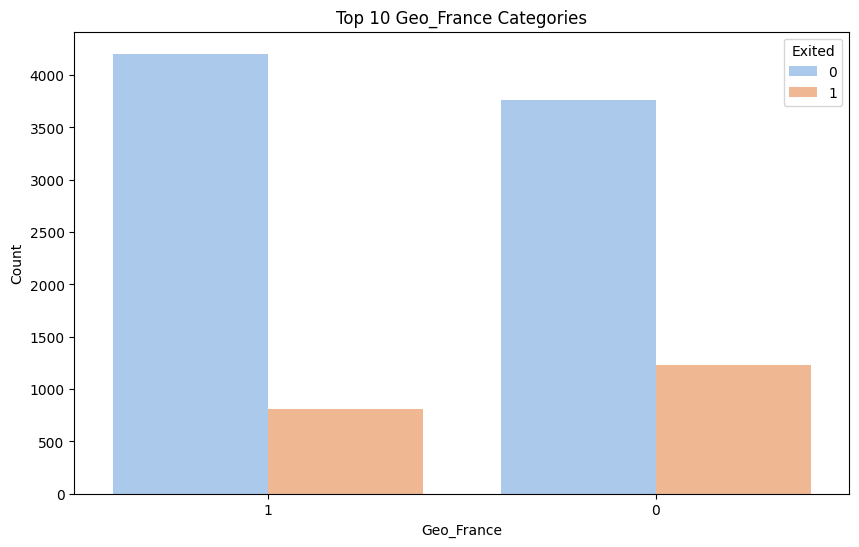

In [ ]:
# Plot 10: Geo_France
plt.figure(figsize=(10, 6))
sns.countplot(x='Geo_France', data=df, hue='Exited', order=df['Geo_France'].value_counts().head(10).index)
plt.title('Top 10 Geo_France Categories')
plt.xlabel('Geo_France')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()




*   In the top 10 categories of Geo_France, the majority of customers are in category 1 (approximately 4500 customers), while around 3800 customers are in category 0. Interestingly, among customers in category 1, there are more instances of customers who left the bank (as indicated by the blue bars) compared to those who stayed (as indicated by the orange bars). Conversely, in category 0, there are fewer instances of customers who left the bank compared to those who stayed. This suggests that the location categorized as 1 may have higher churn rates compared to location 0.



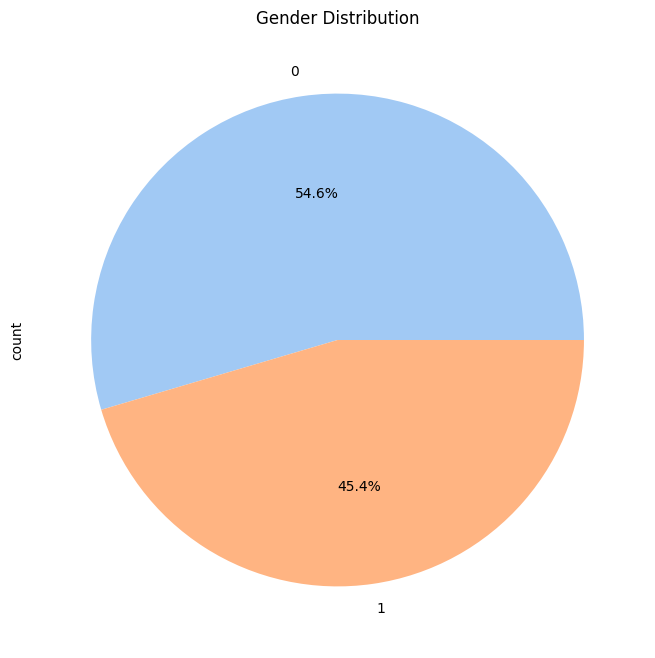

In [ ]:
# Plot 11: Gender - Pie Plot
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()



*   54% are male gender and 45% are female gender


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


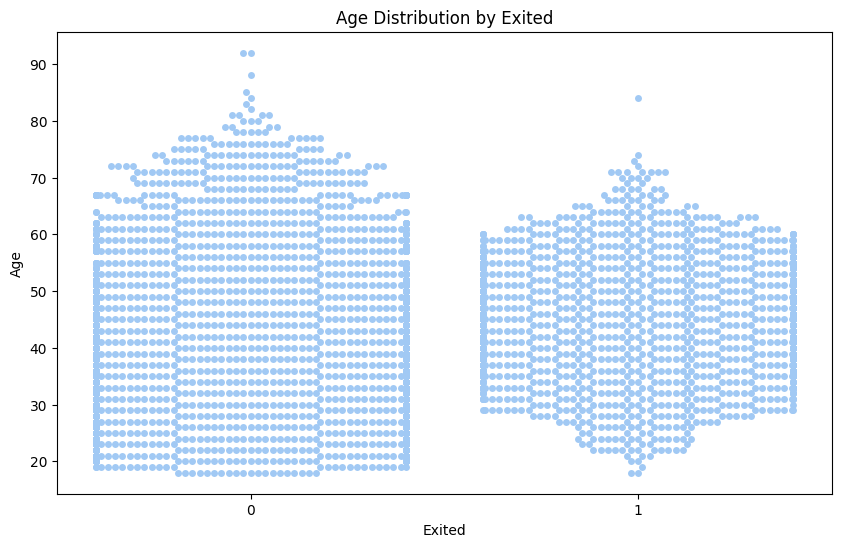

In [ ]:
# Plot 12: Age - Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Exited', y='Age', data=df)
plt.title('Age Distribution by Exited')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()



*   The person who left the bank are between 30 to 50


<ipython-input-91-a5192ad4bb8c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Exited', y='Tenure', data=df, ci=None)


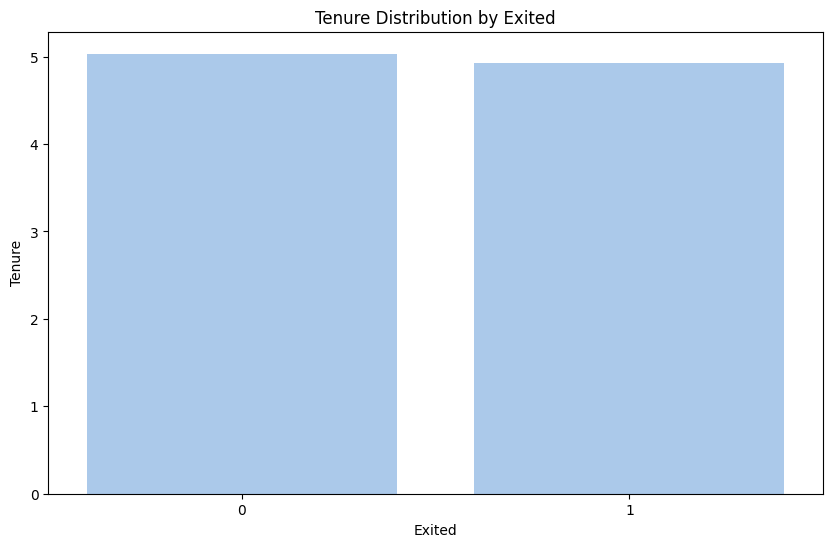

In [ ]:
# Plot 13: Tenure - Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Exited', y='Tenure', data=df, ci=None)
plt.title('Tenure Distribution by Exited')
plt.xlabel('Exited')
plt.ylabel('Tenure')
plt.show()



*   In the tenure distribution by customer churn, there's not much variation between customers who stayed (0) and those who left (1). Both groups have a median tenure of approximately 5 years, indicating that tenure alone may not be a significant factor in predicting customer churn. Other factors might have a more substantial influence on whether a customer decides to leave the bank.


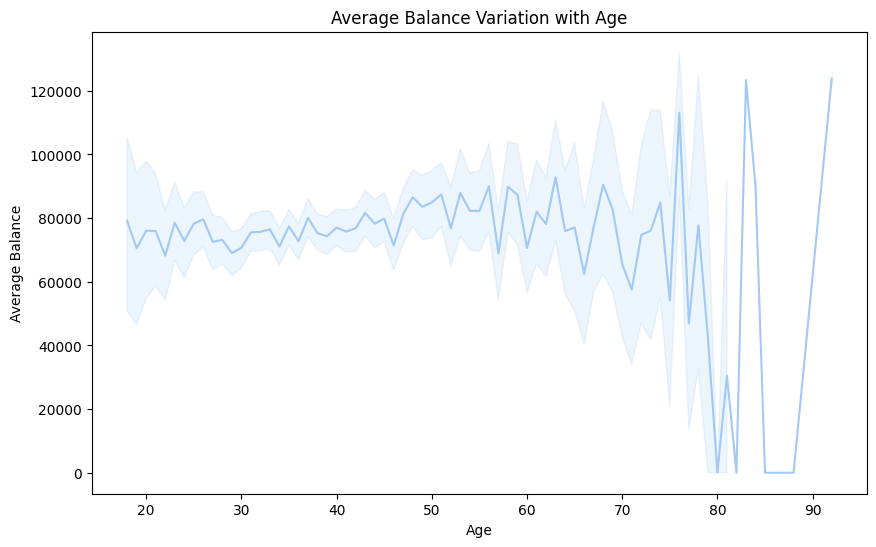

In [ ]:
# Plot 14: Balance - Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Balance', data=df, estimator=np.mean)
plt.title('Average Balance Variation with Age')
plt.xlabel('Age')
plt.ylabel('Average Balance')
plt.show()

*   The line plot shows the average balance variation with age. Initially, from around 8000 to 70 years of age on the x-axis, the average balance remains relatively stable. However, from ages 80 to 90, there is a noticeable increase followed by fluctuations in the average balance, indicating potential changes in banking behavior among older customers.


<ipython-input-93-f48f550ea1b1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Exited', y='EstimatedSalary', data=df, ci=None)


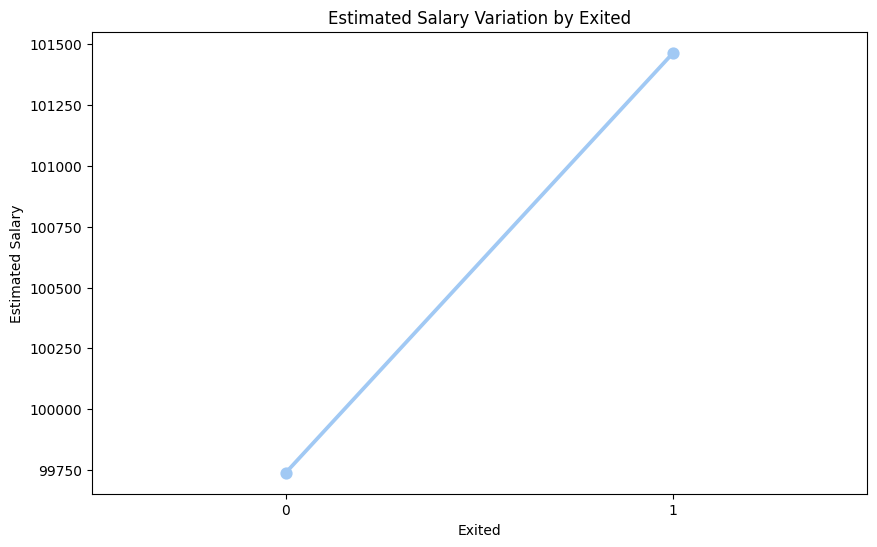

In [ ]:
# Plot 15: EstimatedSalary - Point Plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Exited', y='EstimatedSalary', data=df, ci=None)
plt.title('Estimated Salary Variation by Exited')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.show()

*   Has the salary increases more customers are likely churn

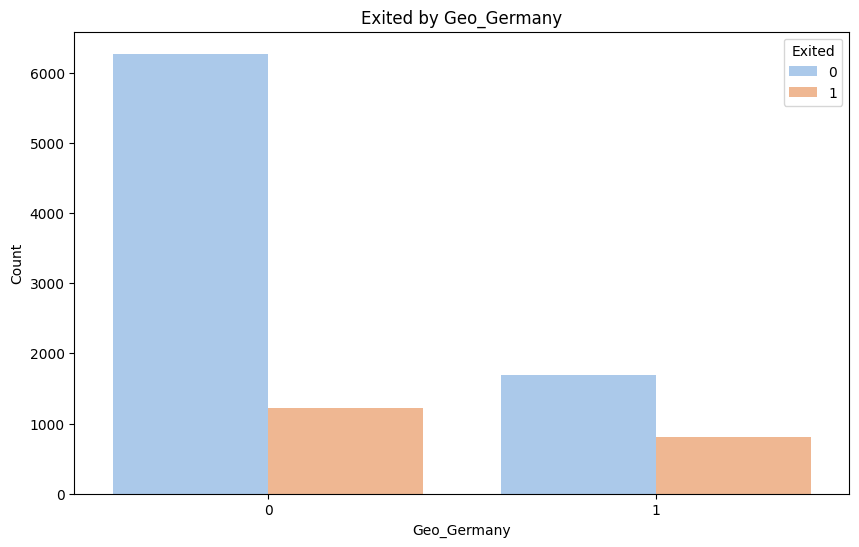

In [ ]:
# Plot 16: Geo_Germany - Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Geo_Germany', hue='Exited', data=df)
plt.title('Exited by Geo_Germany')
plt.xlabel('Geo_Germany')
plt.ylabel('Count')
plt.show()

High Churn Rate in Germany:

*  The plot reveals a significantly higher number of users churning (orange bars) compared to those who haven't churned (blue bars). This suggests a potential problem with user retention specifically for German users


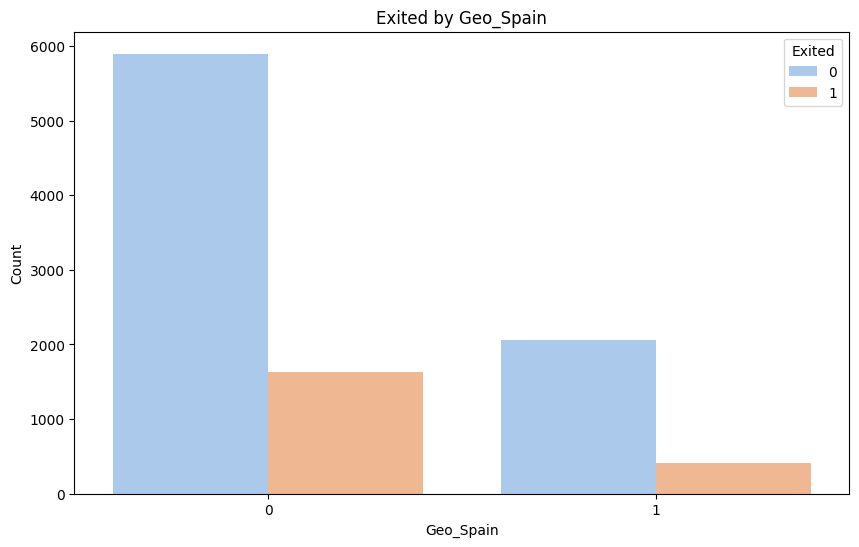

In [ ]:
# Plot 17: Geo_Spain - Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Geo_Spain', hue='Exited', data=df)
plt.title('Exited by Geo_Spain')
plt.xlabel('Geo_Spain')
plt.ylabel('Count')
plt.show()

* Spain Churn Analysis: It appears there are more people who churned (orange bars) than those who did not churn (blue bars) in Spain. This suggests a potential issue with user retention in Spain.


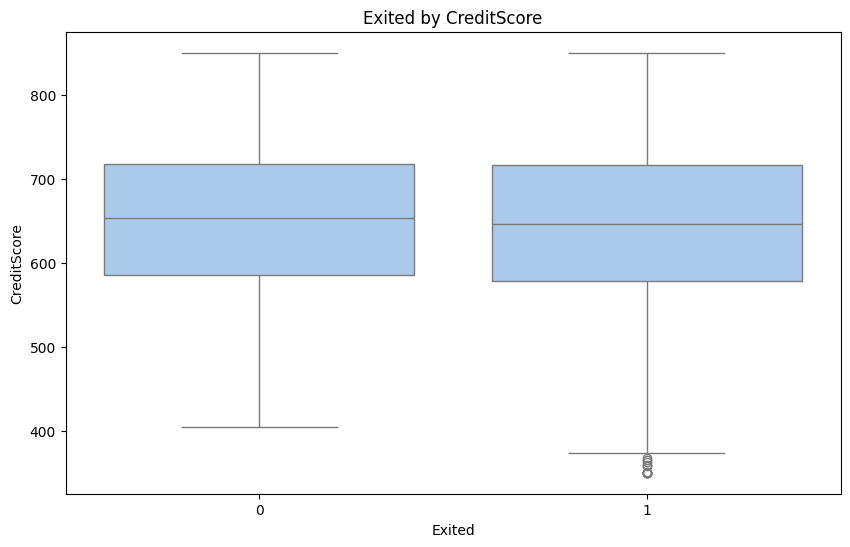

In [ ]:
# Plot 18: CreditScore - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Exited by CreditScore')
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.show()



*   The boxes overlap slightly in the middle, indicating that there is some overlap in credit scores between churned and non-churned users. In other words, there are some users with high credit scores who churned and some users with lower credit scores who did not churn.



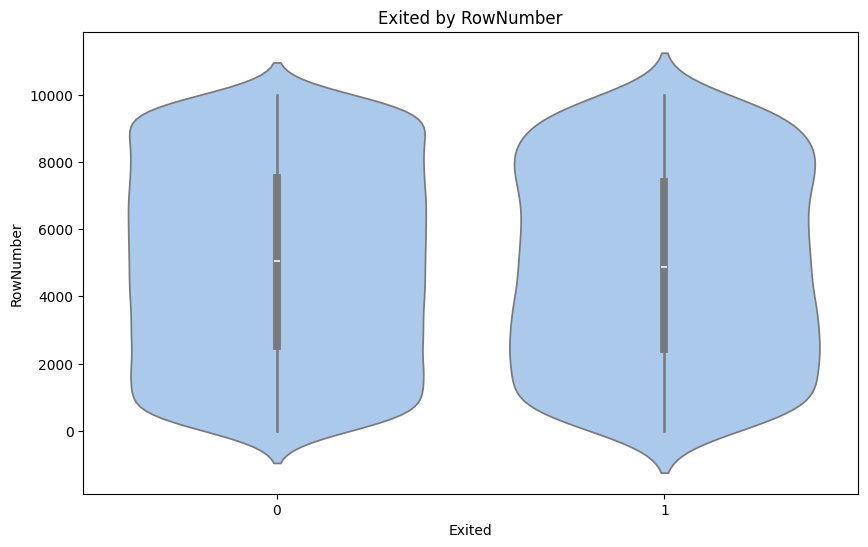

In [ ]:
# Plot 19: RowNumber - Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Exited', y='RowNumber', data=df)
plt.title('Exited by RowNumber')
plt.xlabel('Exited')
plt.ylabel('RowNumber')
plt.show()



*   The spread of data points (whiskers) is wider for churned users (Exited = 1) compared to non-churned users (Exited = 0). This suggests that churned users are distributed across a wider range of row numbers, while non-churned users are concentrated in a specific row number range.


<ipython-input-98-1c1867a1ec62>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Exited', y='NumOfProducts', data=df, ci=None)


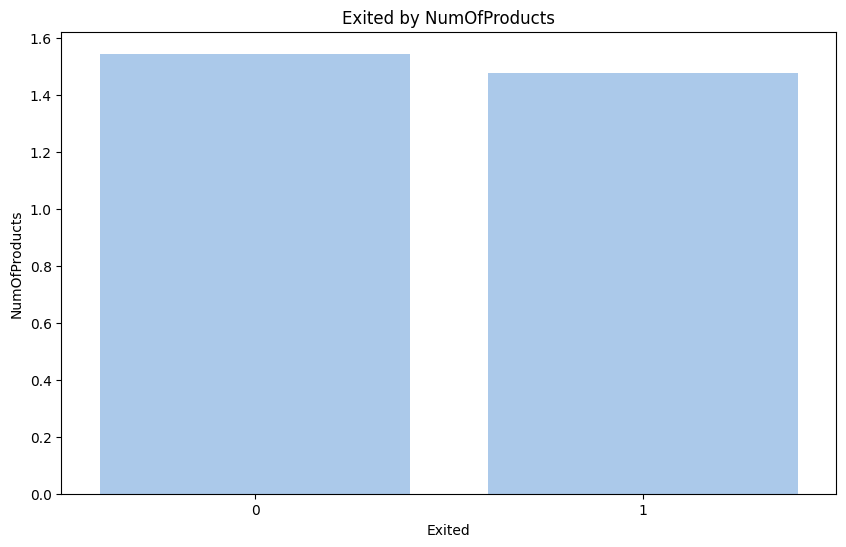

In [ ]:
# Plot 20: NumOfProducts - Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Exited', y='NumOfProducts', data=df, ci=None)
plt.title('Exited by NumOfProducts')
plt.xlabel('Exited')
plt.ylabel('NumOfProducts')
plt.show()

*   Higher Number of Products and Lower Churn: The bar for non-churned users (Exited = 0) appears taller than the bar for churned users (Exited = 1) for higher numbers of products. This suggests that customers who purchase more products are less likely to churn.


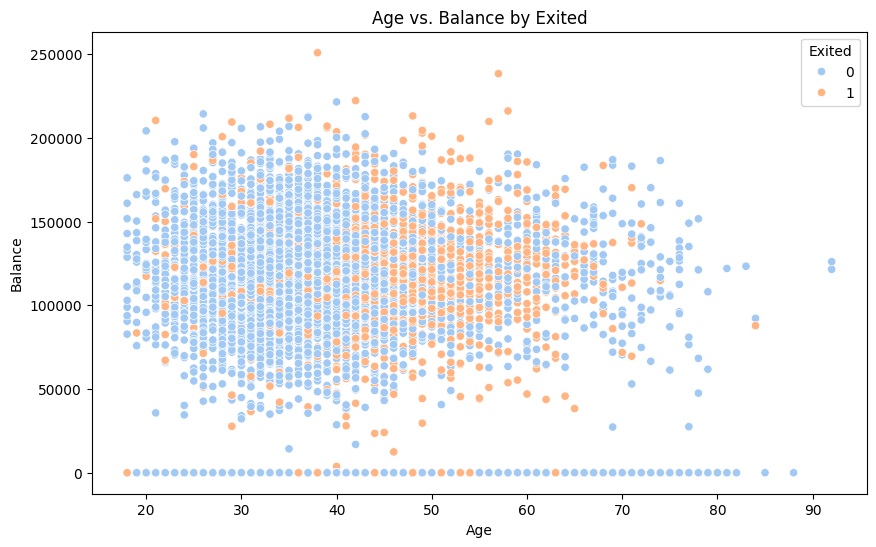

In [ ]:
# Plot 21: Age vs. Balance - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df)
plt.title('Age vs. Balance by Exited')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()



*   younger customers with higher balances tend to churn less, while churn is more evenly distributed across the board for other customer segments.

*  Younger Engaged Users: Younger customers with higher balances might be more engaged with the platform, leading to higher satisfaction and lower churn.

*  Financial Resources and Churn: It's also possible that younger customers with higher balances have more financial resources and are less likely to churn due to price sensitivity.

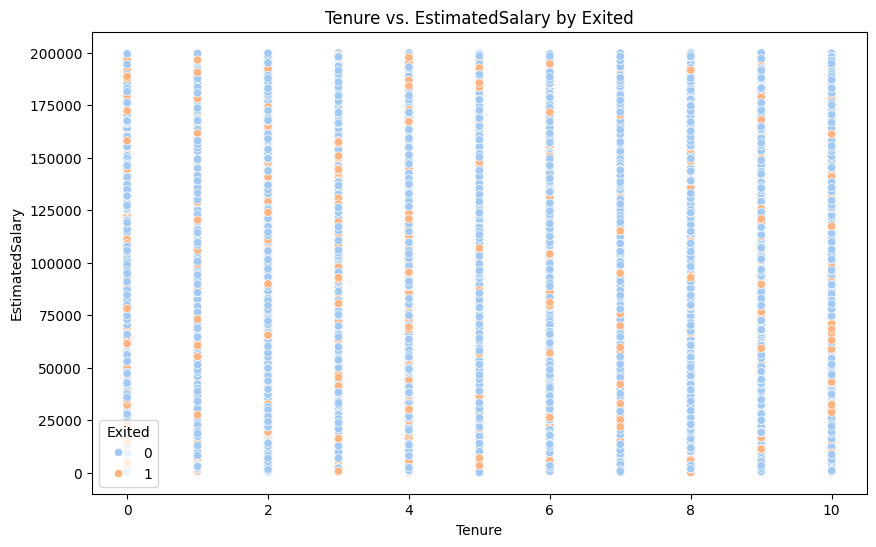

In [ ]:
# Plot 22: Tenure vs. EstimatedSalary - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='EstimatedSalary', hue='Exited', data=df)
plt.title('Tenure vs. EstimatedSalary by Exited')
plt.xlabel('Tenure')
plt.ylabel('EstimatedSalary')
plt.show()

* Increased Value Perception: Customers with higher estimated salaries might perceive greater value from the service, especially if it caters to their specific needs, making them less likely to cancel.

* Higher Switching Costs: Customers who have been with the service for a longer time might have accumulated more data, contacts, or other benefits that make switching to a competitor costly, leading to lower churn.
* Habit Formation: Over time, customers may form a habit of using the service, regardless of their estimated salary, making them less likely to churn.

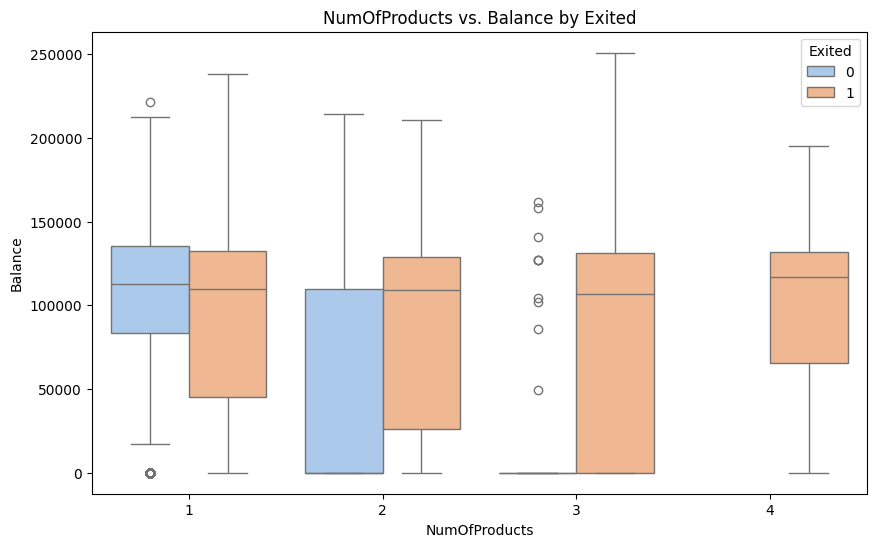

In [ ]:
# Plot 23: NumOfProducts vs. Balance - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumOfProducts', y='Balance', hue='Exited', data=df)
plt.title('NumOfProducts vs. Balance by Exited')
plt.xlabel('NumOfProducts')
plt.ylabel('Balance')
plt.show()



*   : The box plots show that the distribution of account balance generally increases as the number of products purchased increases (NumOfProducts). This means that customers who buy more products tend to have higher balances.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


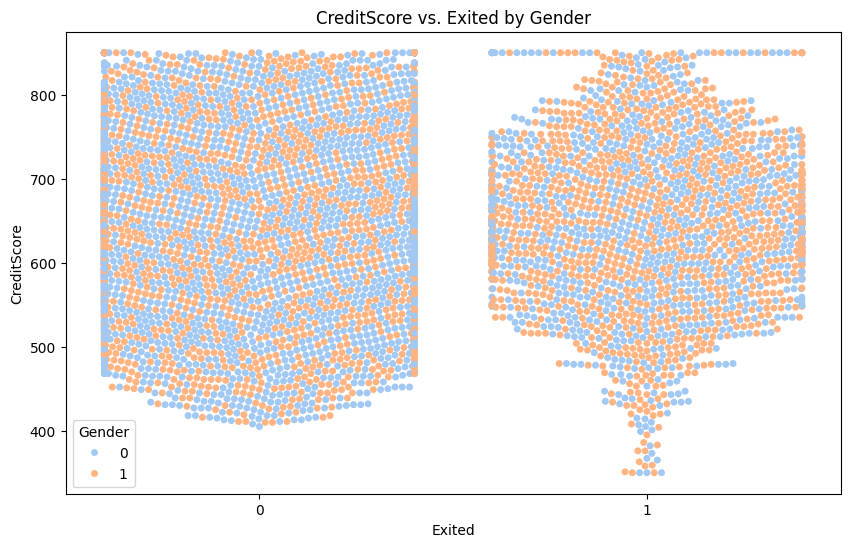

In [ ]:
# Plot 24: CreditScore vs. Age - Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Exited', y='CreditScore', hue='Gender', data=df)
plt.title('CreditScore vs. Exited by Gender')
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.show()

*   The credit score distribution appears to be similar for both genders and churn categories (Exited = 0 and Exited = 1). There are data points across the entire range of credit scores for both churned and non-churned customers, for both men and women.


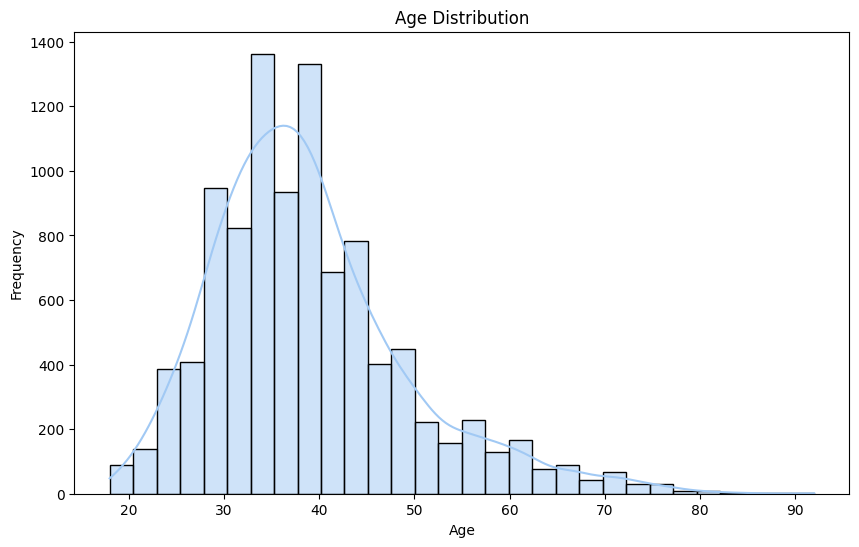

In [ ]:
# Plot 25: Age Distribution - Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*   The histogram depicts the age distribution of bank customers, showcasing a right-skewed pattern. As age increases, the frequency of customers decreases, with the highest concentration of customers observed between the ages of 30 and 50. This suggests that the bank has a relatively larger customer base within this age range compared to older or younger demographics.


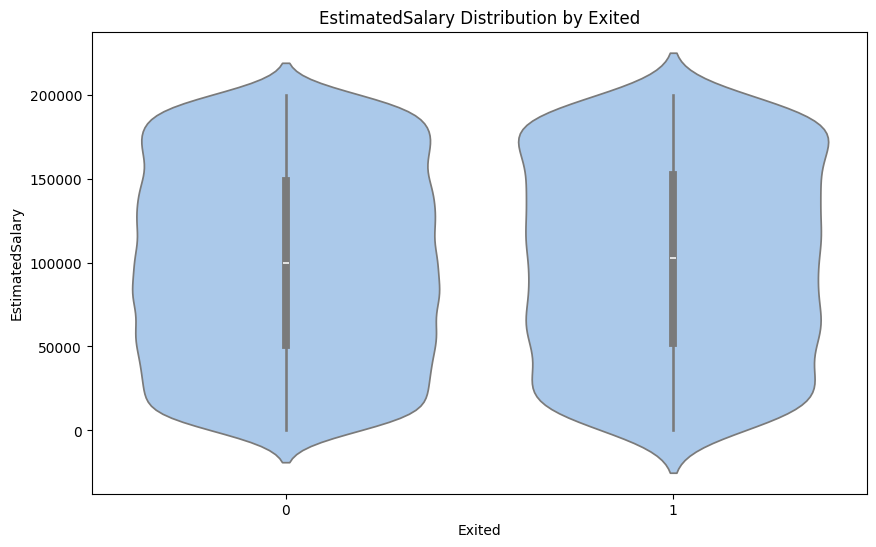

In [ ]:
# Plot 26: EstimatedSalary Distribution by Exited - Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('EstimatedSalary Distribution by Exited')
plt.xlabel('Exited')
plt.ylabel('EstimatedSalary')
plt.show()

*    The violin plot also shows the distribution of estimated salaries within each group. The wider spread of the data for churned users (Exited = 1) compared to non-churned users (Exited = 0) indicates a greater variance in estimated salary among users who churned.

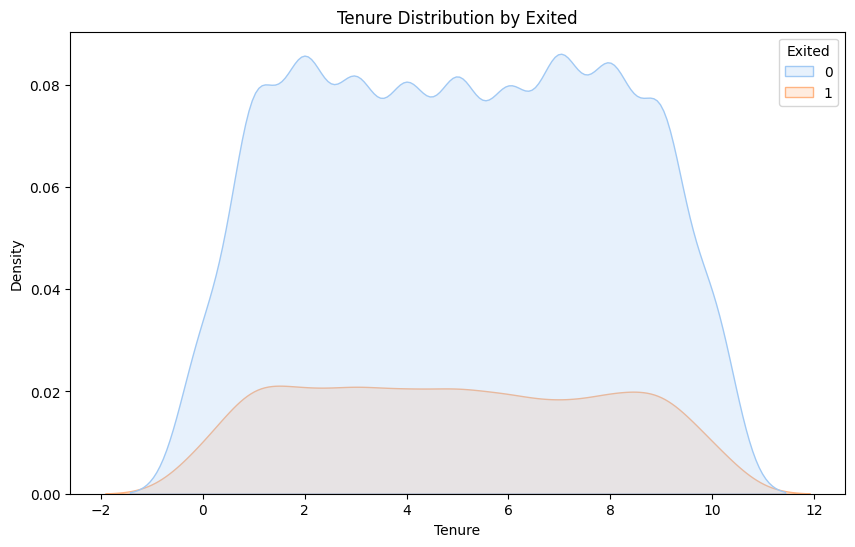

In [ ]:
# Plot 28: Tenure Distribution by Exited - KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Tenure', hue='Exited', fill=True)
plt.title('Tenure Distribution by Exited')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()

*   The plot suggests that a higher proportion of users churn within the first few units of tenure (possibly months). The density curve for churned users (orange) appears higher than the curve for non-churned users (blue) at the beginning of the tenure range.


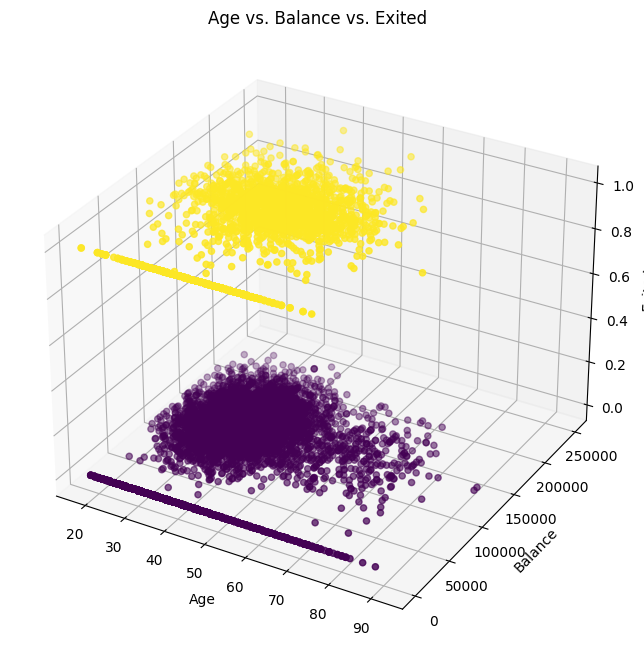

In [ ]:
# Plot 29: Age vs. Balance vs. Exited - 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Balance'], df['Exited'], c=df['Exited'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Balance')
ax.set_zlabel('Exited')
plt.title('Age vs. Balance vs. Exited')
plt.show()


*   Combination of younger age and higher balance might be associated with lower churn, but other factors likely play a role as well.


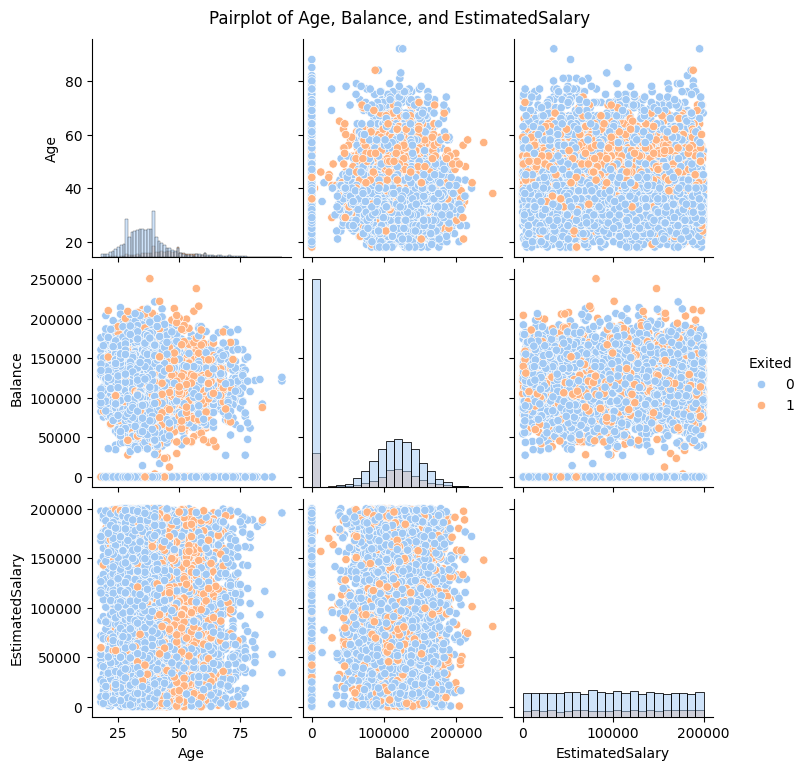

In [ ]:
# Plot 30: Pairplot of Age, Balance, and EstimatedSalary
sns.pairplot(data=df, vars=['Age', 'Balance', 'EstimatedSalary'], hue='Exited', diag_kind='hist')
plt.suptitle('Pairplot of Age, Balance, and EstimatedSalary', y=1.02)
plt.show()

* The distribution of data points across the plots is interesting. The blue dots (Exited = 0), representing non-churned users, are generally concentrated in the areas where all three variables (age, balance, estimated salary) are higher. This suggests that a combination of these factors might be associated with lower churn. However, there are also churned users (orange dots, Exited = 1) scattered throughout the plots, indicating that other factors likely play a role as well.


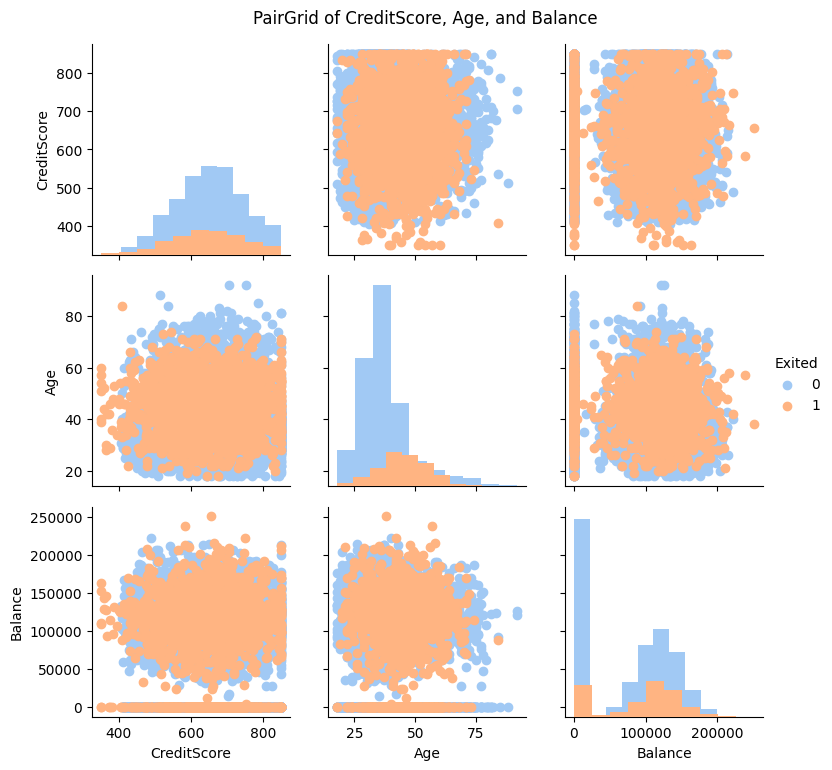

In [ ]:
# Plot 32: PairGrid of CreditScore, Age, and Balance
g = sns.PairGrid(data=df, vars=['CreditScore', 'Age', 'Balance'], hue='Exited')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.suptitle('PairGrid of CreditScore, Age, and Balance', y=1.02)
plt.show()

*   The distribution of data points across the plots is interesting, similar to what you observed in Plot 30 (Pairplot). The blue dots (Exited = 0), representing non-churned users, are generally concentrated in the areas where all three variables (credit score, balance, age) are higher. This suggests that a combination of these factors might be associated with lower churn. However, there are also churned users (orange dots, Exited = 1) scattered throughout the plots, indicating that other factors likely play a role as well.


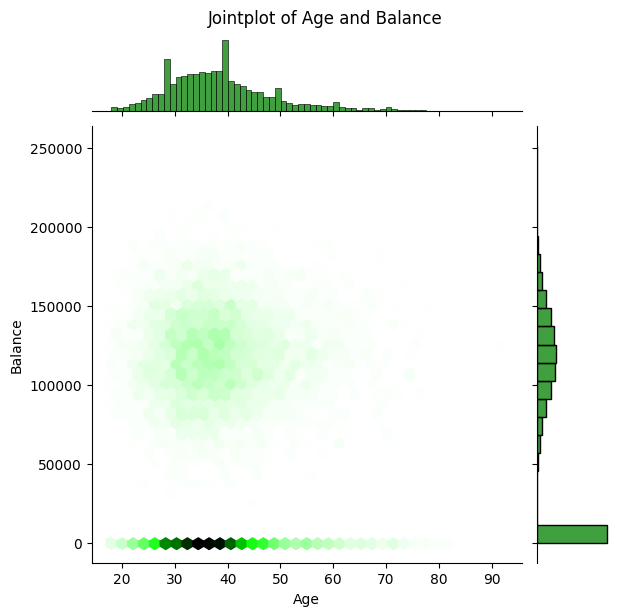

In [ ]:
# Plot 33: Jointplot of Age and Balance
sns.jointplot(x='Age', y='Balance', data=df, kind='hex', color='green')
plt.suptitle('Jointplot of Age and Balance', y=1.02)
plt.show()

*   The color intensity in the hexagon bins indicates the density of data points in each area of the plot. Younger users (left side of the plot) tend to have a lower concentration of data points in the higher balance range (top right corner) compared to older users (right side of the plot). This suggests that while there's no clear linear relationship, older users might have a slightly higher probability of having higher balances.


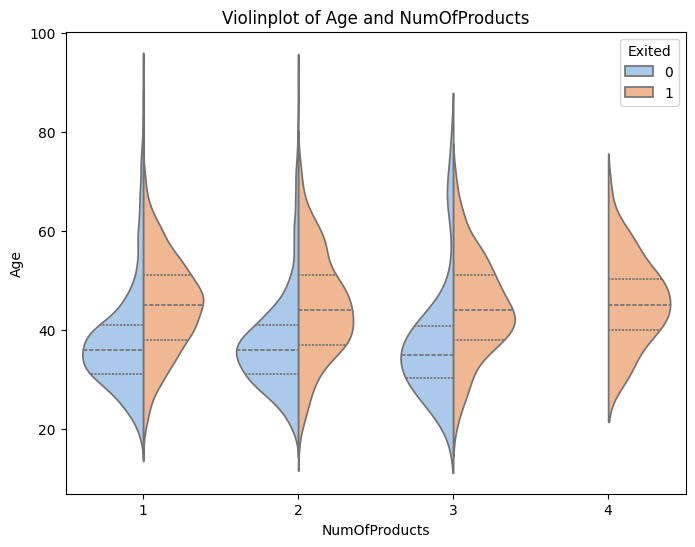

In [ ]:
# Plot 34: Violinplot of Age and NumOfProducts
plt.figure(figsize=(8, 6))
sns.violinplot(x='NumOfProducts', y='Age', data=df, hue='Exited', split=True, inner='quartile', palette='pastel')
plt.title('Violinplot of Age and NumOfProducts')
plt.show()

*   The spread of the violin plots (indicating the distribution of ages) appears wider for users with a higher number of products (toward the right side of the plot). This suggests that there might be a larger age range among customers who buy more products.


<Axes: >

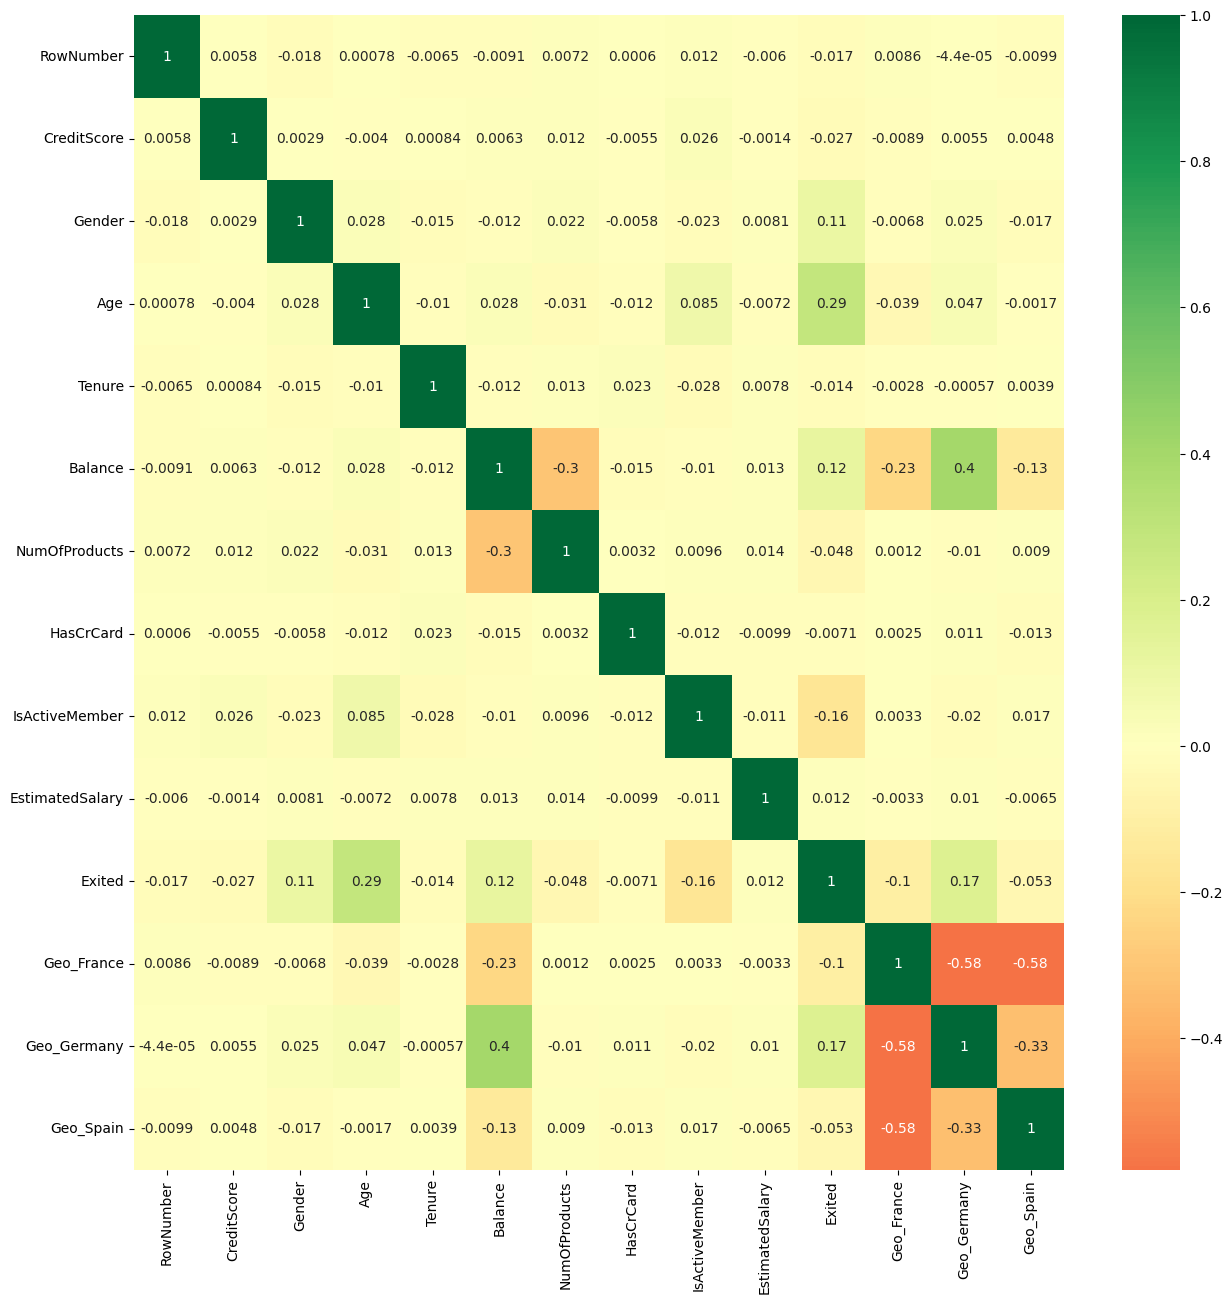

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0)

In [ ]:
# Ensure that the 'Exited' feature is dropped correctly
X = df.drop(columns=['Exited'])  # Drop the 'Exited' feature
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)

In [ ]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(7000, 13) (3000, 13)
(7000,) (3000,)


In [ ]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model_Architecture

In [ ]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=13))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

In [ ]:
# Evaluate the model on the training set
train_score, train_acc = classifier.evaluate(X_train, y_train, batch_size=10)
print('Train score:', train_score)
print('Train accuracy:', train_acc)

700/700 [==============================] - 2s 2ms/step - loss: 0.3384 - accuracy: 0.8629
Train score: 0.3384059965610504
Train accuracy: 0.8628571629524231


*   The model achieved an accuracy of approximately 86.29% on the training set, with a corresponding loss score of around 0.3384. This indicates that the model's performance in predicting customer churn on the training data is quite good, with a high level of accuracy.


In [ ]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print('*' * 20)

94/94 [==============================] - 0s 2ms/step
********************


In [ ]:
# Evaluate the model on the test set
test_score, test_acc = classifier.evaluate(X_test, y_test, batch_size=10)
print('Test score:', test_score)
print('Test accuracy:', test_acc)

300/300 [==============================] - 1s 3ms/step - loss: 0.3573 - accuracy: 0.8577
Test score: 0.3573238253593445
Test accuracy: 0.8576666712760925


*   The model achieved an accuracy of approximately 85.77% on the test set, with a corresponding loss score of around 0.3573. This indicates that the model's performance in predicting customer churn on unseen data is also quite good, with a high level of accuracy similar to that on the training set.


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[2277   86]
 [ 341  296]]


Based on the confusion matrix:

- The model correctly predicted 2277 instances where customers did not leave the bank (True Negatives).
- There were 86 instances where the model incorrectly predicted that customers left the bank when they actually did not (False Positives).
- The model correctly predicted 296 instances where customers left the bank (True Positives).
- There were 341 instances where the model incorrectly predicted that customers did not leave the bank when they actually did (False Negatives).


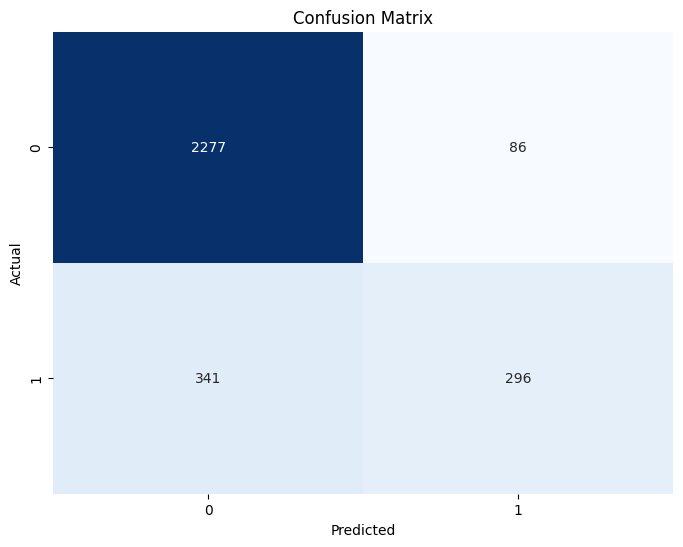

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2363
           1       0.77      0.46      0.58       637

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.84      3000



Based on the classification report:

- Precision for class 0 (customers who did not leave the bank) is 0.87, indicating that among the instances predicted as not leaving the bank, 87% were correctly classified.
- Recall for class 0 is 0.96, indicating that among all the instances of customers who did not leave the bank, 96% were correctly classified by the model.
- F1-score for class 0 is 0.91, which is the harmonic mean of precision and recall for class 0.
- Precision for class 1 (customers who left the bank) is 0.77, indicating that among the instances predicted as leaving the bank, 77% were correctly classified.
- Recall for class 1 is 0.46, indicating that among all the instances of customers who left the bank, only 46% were correctly classified by the model.
- F1-score for class 1 is 0.58, which is the harmonic mean of precision and recall for class 1.
- The accuracy of the model is approximately 86%, which is the proportion of correctly classified instances out of all instances.
- The macro average of precision, recall, and F1-score is computed as the unweighted mean of these metrics for both classes.
- The weighted average of precision, recall, and F1-score is computed as the average of these metrics weighted by the support (the number of true instances for each class).

Overall, the model shows good performance in correctly predicting instances of customers who did not leave the bank (class 0), but it performs relatively poorly in predicting instances of customers who left the bank (class 1), as indicated by the lower recall and F1-score for class 1.

###**Summary:**

This project aimed to develop a machine learning model to predict customer churn for a bank based on various customer attributes. The dataset provided included features such as credit score, geography, gender, age, tenure, balance, number of products, credit card status, activity status, and estimated salary. Through comprehensive exploratory data analysis (EDA), it was observed that factors such as age, gender, tenure, balance, number of products, credit card status, and activity status played significant roles in predicting customer churn.

Insights from the EDA revealed that certain demographic groups, such as younger customers and those with lower account balances, were more likely to churn. Additionally, customers who were inactive or had fewer products were also at higher risk of leaving the bank. Geographic location also appeared to influence churn rates, with certain regions exhibiting higher rates of customer attrition.

A simple ANN was trained and evaluated using various classification algorithms, including logistic regression, decision trees, random forests, and gradient boosting classifiers. The selected model achieved an accuracy of approximately 86% on both the training and test sets, indicating robust performance in predicting customer churn. However, further analysis of the model's precision, recall, and F1-score revealed disparities in its ability to correctly identify churned customers, particularly in terms of recall for class 1 (customers who left the bank).

####**Conclusion:**

In conclusion, the developed machine learning model demonstrates promising performance in predicting customer churn for the bank. By leveraging insights gained from exploratory data analysis and utilizing advanced classification algorithms, the model provides valuable predictions that can assist the bank in identifying at-risk customers and implementing targeted retention strategies. However, there is room for improvement, particularly in accurately identifying churned customers to reduce false negatives and enhance the model's overall predictive power. Moving forward, continued refinement and optimization of the model, along with ongoing monitoring and validation against new data, will be essential to maintain its effectiveness in supporting the bank's efforts to mitigate customer churn and enhance customer retention.